In [9]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()
# clutering은 x만 가지고 하기때문에 y값 제외하고 해야겠지

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


## DBSCAN 결과 시각화

C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encounte

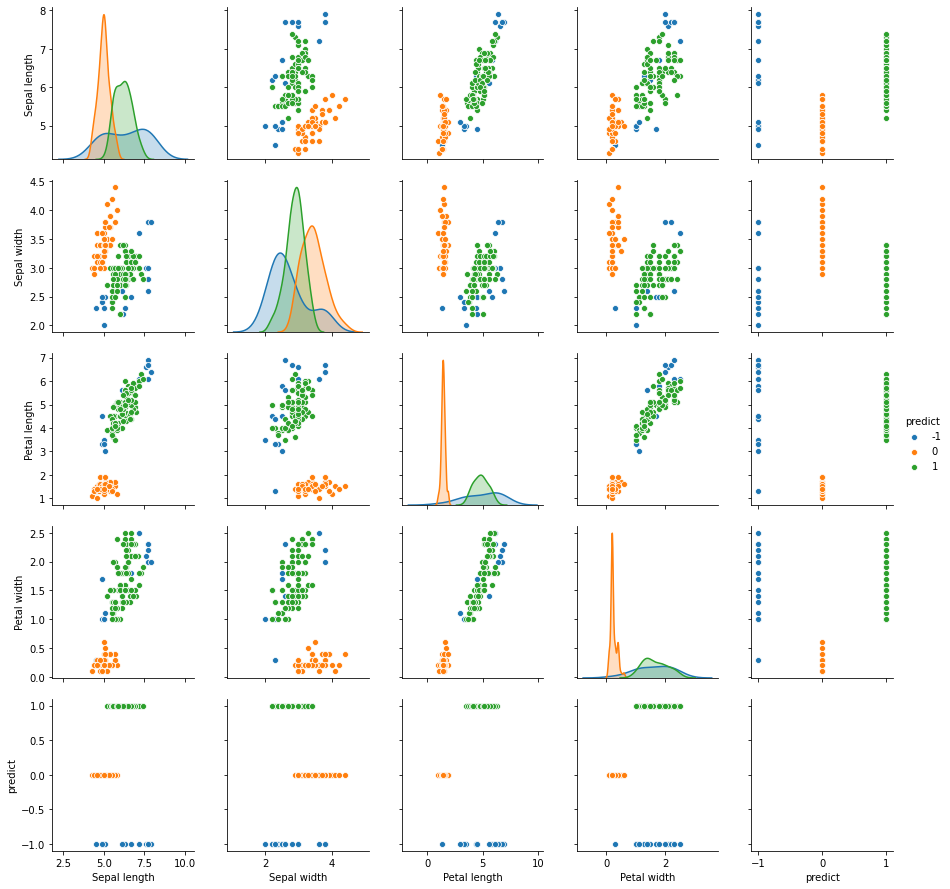

In [12]:
# pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()

## 실제 데이터 시각화

C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encounte

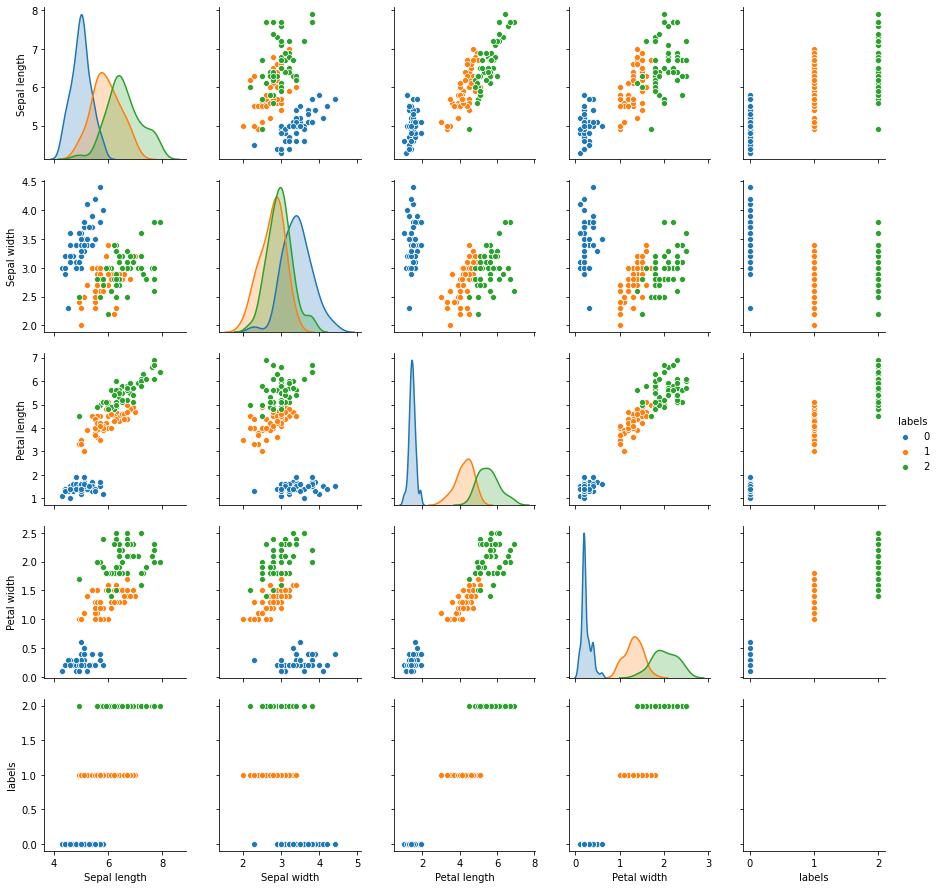

In [7]:
# pairplot with Seaborn
sns.pairplot(data, hue='labels')
plt.show()

## Kmeans 결과와 비교 

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [14]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [15]:
r2 = pd.concat([feature,new_labels],axis=1)

C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hyun\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encounte

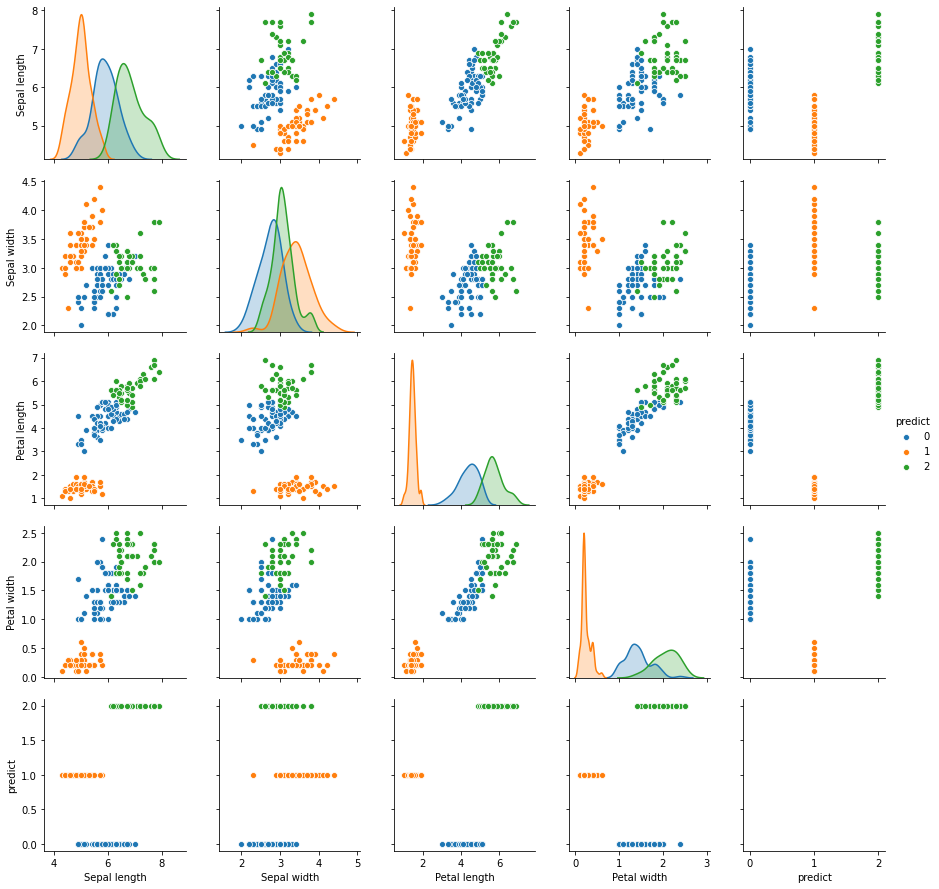

In [16]:
# pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

# k-means가 DBSCAN보다 결과가 더 좋지, 분명 수업시간에는 DBSCAN이 더 좋다고 했는데
# 이유가 뭘까? k-means같은 경우에는 k개의 군집으로 나눠서 일반적으로 100개 데이터라고하면
# 33개씩 할당되는 경향이 있어, 즉 균일하게 가져간다라는거야
# 이 데이터같은 경우, 실제 데이터분포를 보면 주황색과 연두색으로 분류된 데이터들이 너무 가까워서
# DBSCAN은 이 둘을 따로 군집화할 수 없고 하나의 군집으로 묶어버리는거지
# iris 데이터에서는 k-means가 결과가 더 좋더라! 라는 것
# 아무튼 DBSCAN의 장점은 k를 설정하지않아도 된다는 것

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [18]:
data = np.load('./data/clusterable_data.npy')

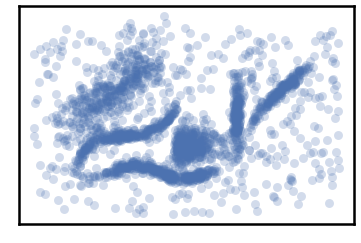

In [19]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# 이러한 밀도를 가지는 데이터에 대해 DBSCAN 해보자
# 이것만 봐서는 대충 6개의 군집이 형성될 것이라고 예상되지

In [21]:
# 군집한 결과를 ploting하는 함수
# algorithm은 clustering 알고리즘 중 하나가 들어오겠지
# date를 가지고 알고리즘 적용시켜서 sns plot으로 적용하는 함수

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

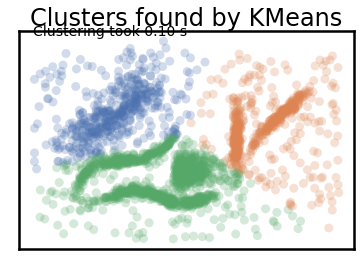

In [22]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

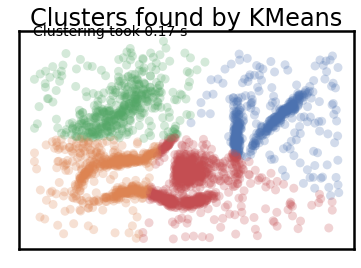

In [24]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

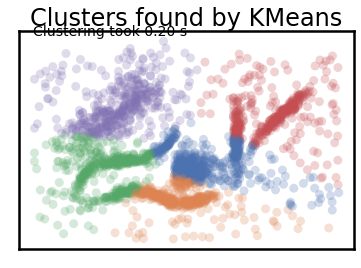

In [25]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

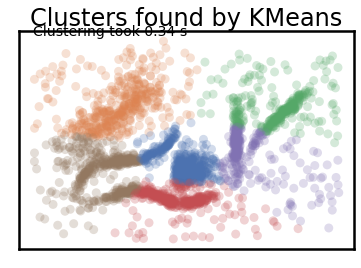

In [26]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

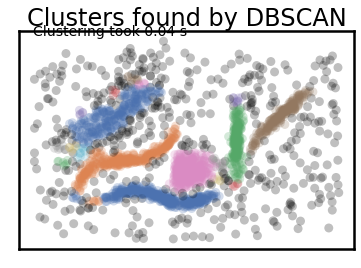

In [30]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

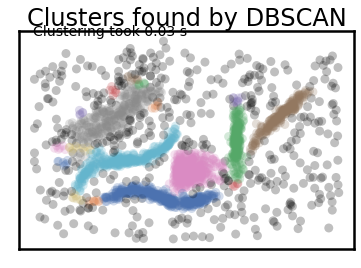

In [34]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.021})

In [35]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)

In [36]:
dbs2.labels_ # 각 데이터마다 할당된 군집 볼 수 있음

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

### HDBSCAN
#### - DBSCAN의 발전된 version, 하이퍼 파라미터에 덜 민감함 

In [38]:
import hdbscan

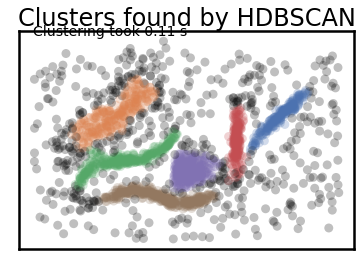

In [40]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})